In [28]:
source("../../../src/utils/custom_tools.R")
setup_environment("../../../src/utils")

ERROR: Error: package or namespace load failed for ‘tidyverse’ in dyn.load(file, DLLpath = DLLpath, ...):
 unable to load shared object '/Users/guilminp/anaconda3/lib/R/library/nlme/libs/nlme.so':
  dlopen(/Users/guilminp/anaconda3/lib/R/library/nlme/libs/nlme.so, 6): Symbol not found: _libintl_dgettext
  Referenced from: /Users/guilminp/anaconda3/lib/R/library/nlme/libs/nlme.so
  Expected in: /Users/guilminp/anaconda3/lib/R/lib/libR.dylib
 in /Users/guilminp/anaconda3/lib/R/library/nlme/libs/nlme.so


In [35]:
utils_folder_name <- "../../../src/utils"

source(paste0(utils_folder_name, "/custom_tools_ggplot.R")) # ggplot tools
source(paste0(utils_folder_name, "/custom_tools_data.R"))   # tools to handle the data

library('ggplot2')
suppressPackageStartupMessages(library("gridExtra")) # used to arrange ggplots in a grid

theme_set(theme_minimal())

options(repr.plot.res = 300,        # set a high-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 600, # set the maximum number of rows displayed
        repr.matrix.max.cols = 200) # set the maximum number of columns displayed

In [66]:
imp <- read.table("../../../data/all_IMPACT_mutations_20181105.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)
nrow(imp)

[1] 533834

In [67]:
head(imp)

Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,occurence_in_normals,confidence_class,variant_status,sample_coverage,minor_contamination,match_status,variant_caller_cv
TP53,0,MSK-IMPACT,hg19,17,7577515,7577515,+,nonsynonymous_SNV,SNP,T,T,G,novel,P-0000012-T02-IM3,NA,T,T,c.766A>C,p.T256P,227,0.50220,114,569,0.00000,0,59,54,58,56,0,AUTO_OK,NEW_VARIANT,344,0.00810,Matched,1
ARID1A,0,MSK-IMPACT,hg19,1,27101572,27101572,+,synonymous_SNV,SNP,C,C,G,novel,P-0000012-T02-IM3,NA,C,C,c.4854C>G,p.P1618P,281,0.07829,22,879,0.00000,0,126,129,11,11,0,UNKNOWN,NEW_VARIANT,344,0.00810,Matched,1
PTPRS,0,MSK-IMPACT,hg19,19,5244030,5244030,+,synonymous_SNV,SNP,C,C,G,novel,P-0000012-T02-IM3,NA,C,C,c.1452G>C,p.L484L,299,0.37793,113,730,0.00274,2,97,87,61,52,0,UNKNOWN,NEW_VARIANT,344,0.00810,Matched,1
PIK3R3,0,MSK-IMPACT,hg19,1,46521514,46521514,+,nonsynonymous_SNV,SNP,G,G,C,novel,P-0000012-T03-IM3,NA,G,G,c.894C>G,p.I298M,733,0.17599,129,1243,0.00000,0,288,316,61,68,0,AUTO_OK,NEW_VARIANT,428,0.00398,Matched,1
ATR,0,MSK-IMPACT,hg19,3,142178126,142178126,+,nonsynonymous_SNV,SNP,C,C,A,novel,P-0000012-T03-IM3,NA,C,C,c.7292G>T,p.R2431M,482,0.17427,84,581,0.00172,1,221,177,46,38,0,AUTO_OK,NEW_VARIANT,428,0.00398,Matched,1
PDGFRA,0,MSK-IMPACT,hg19,4,55139732,55139732,+,nonsynonymous_SNV,SNP,T,T,A,novel,P-0000012-T03-IM3,NA,T,T,c.1393T>A,p.L465M,570,0.20351,116,811,0.00000,0,252,202,66,50,0,AUTO_OK,NEW_VARIANT,428,0.00398,Matched,1


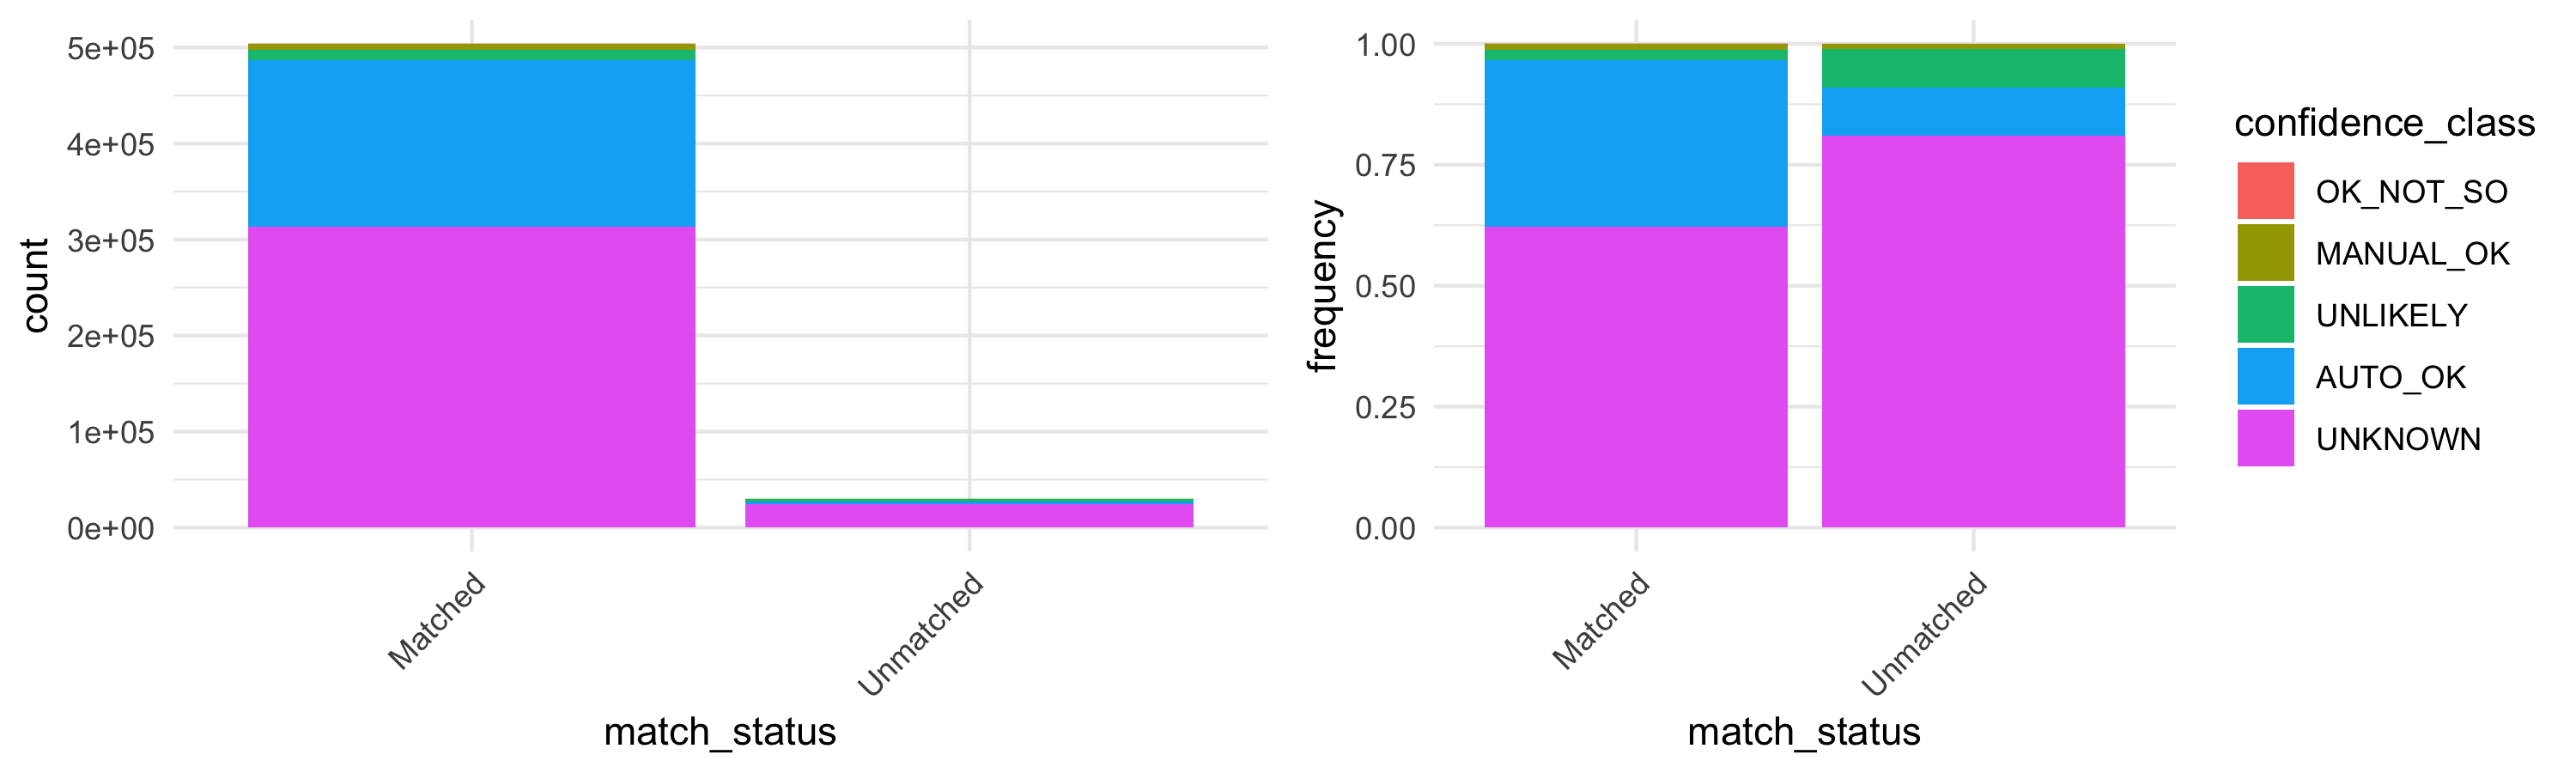

In [68]:
plot_contingency_table_as_histograms(imp, 'match_status', 'confidence_class')

In [84]:
# [+1 feature] create a mutation key feature to idenfity unique mutations
imp$mut_key <- paste(imp$Chromosome,
                        imp$Start_Position,
                        imp$Reference_Allele,
                        imp$Tumor_Seq_Allele2,
                        sep = '_')
  # [+1 feature] create a sample mutation key feature to idenfity unique rows
imp$sample_mut_key <- paste(imp$Tumor_Sample_Barcode, imp$mut_key, sep = '_')

In [85]:
head(imp$sample_mut_key)

[1] "P-0000012-T02-IM3_17_7577515_T_G"  "P-0000012-T03-IM3_1_46521514_G_C" 
[3] "P-0000012-T03-IM3_3_142178126_C_A" "P-0000012-T03-IM3_4_55139732_T_A" 
[5] "P-0000012-T03-IM3_4_153249542_C_A" "P-0000012-T03-IM3_4_153332775_C_A"

In [86]:
imp <- imp[imp$sample_mut_key %in% impact$sample_mut_key,]

In [87]:
nrow(imp)

[1] 186077

In [88]:
get_table(imp$confidence_class)

values,count,freq
AUTO_OK,173338,93.2%
UNLIKELY,6797,3.7%
MANUAL_OK,5942,3.2%
-- total --,186077,100%


In [89]:
imp <- imp[imp$confidence_class != "UNKNOWN" & imp$confidence_class != "OK_NOT_SO",] # keep only the curated mutation (remove 29 rows)

nrow(imp)

[1] 186077

In [90]:
imp$class <- "non-somatic"
imp$class[imp$confidence_class == "AUTO_OK" | imp$confidence_class == "MANUAL_OK"] <- "somatic"
addmargins(table(imp$class, imp$confidence_class), margin = 2)
100 * nrow(imp[imp$class == "non-somatic",]) / nrow(imp) # percentage of non-somatic mutations

,AUTO_OK,MANUAL_OK,UNLIKELY,Sum
non-somatic,0,0,6797,6797
somatic,173338,5942,0,179280


[1] 3.652789

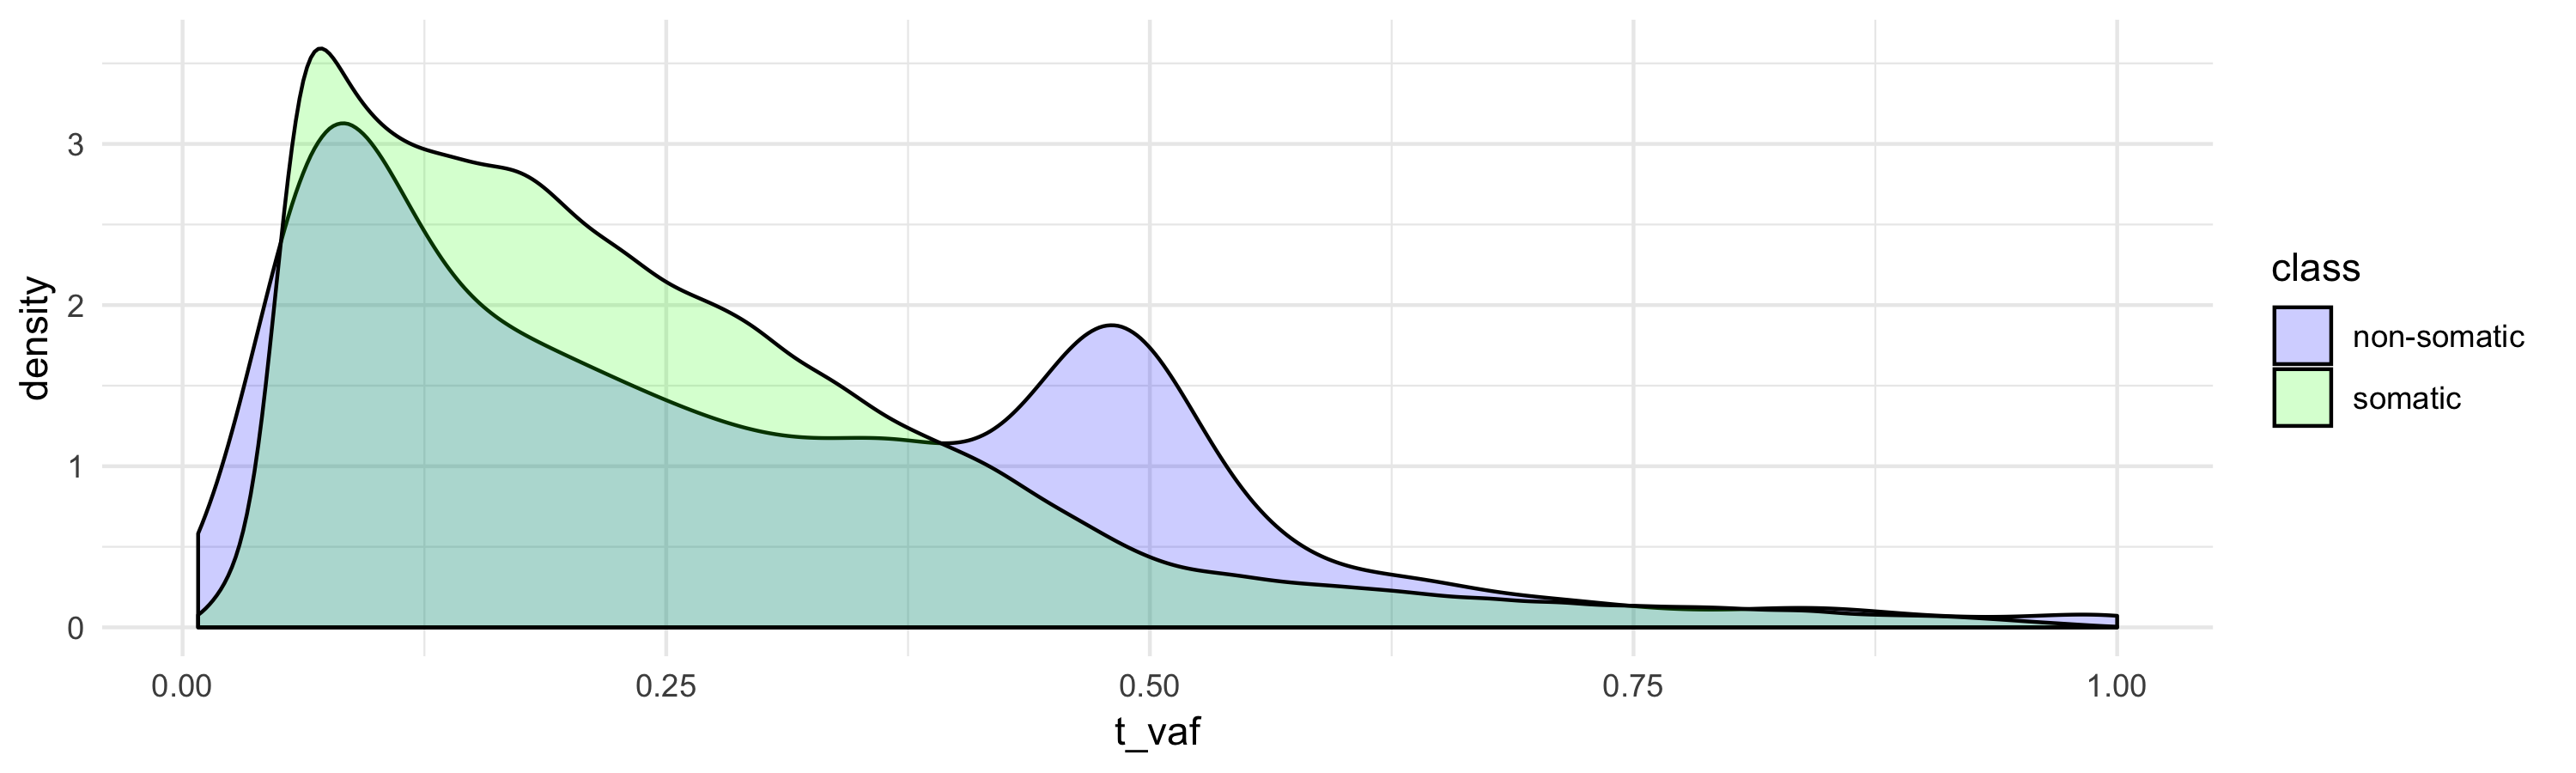

In [91]:
plot_density(imp, "t_vaf", "class")

In [92]:
get_table(imp$match_status)

values,count,freq
Matched,180509,97%
Unmatched,5568,3%
-- total --,186077,100%


In [99]:
nrow(imp[imp$confidence_class == "UNLIKELY" & imp$match_status == 'Unmatched',])

[1] 2320

In [ ]:
imp$class[imp$match_status == 'Unmatched'] <- "unmatched"

In [94]:
get_table(imp$class)

values,count,freq
somatic,176032,94.6%
unmatched,5568,3%
non-somatic,4477,2.4%
-- total --,186077,100%


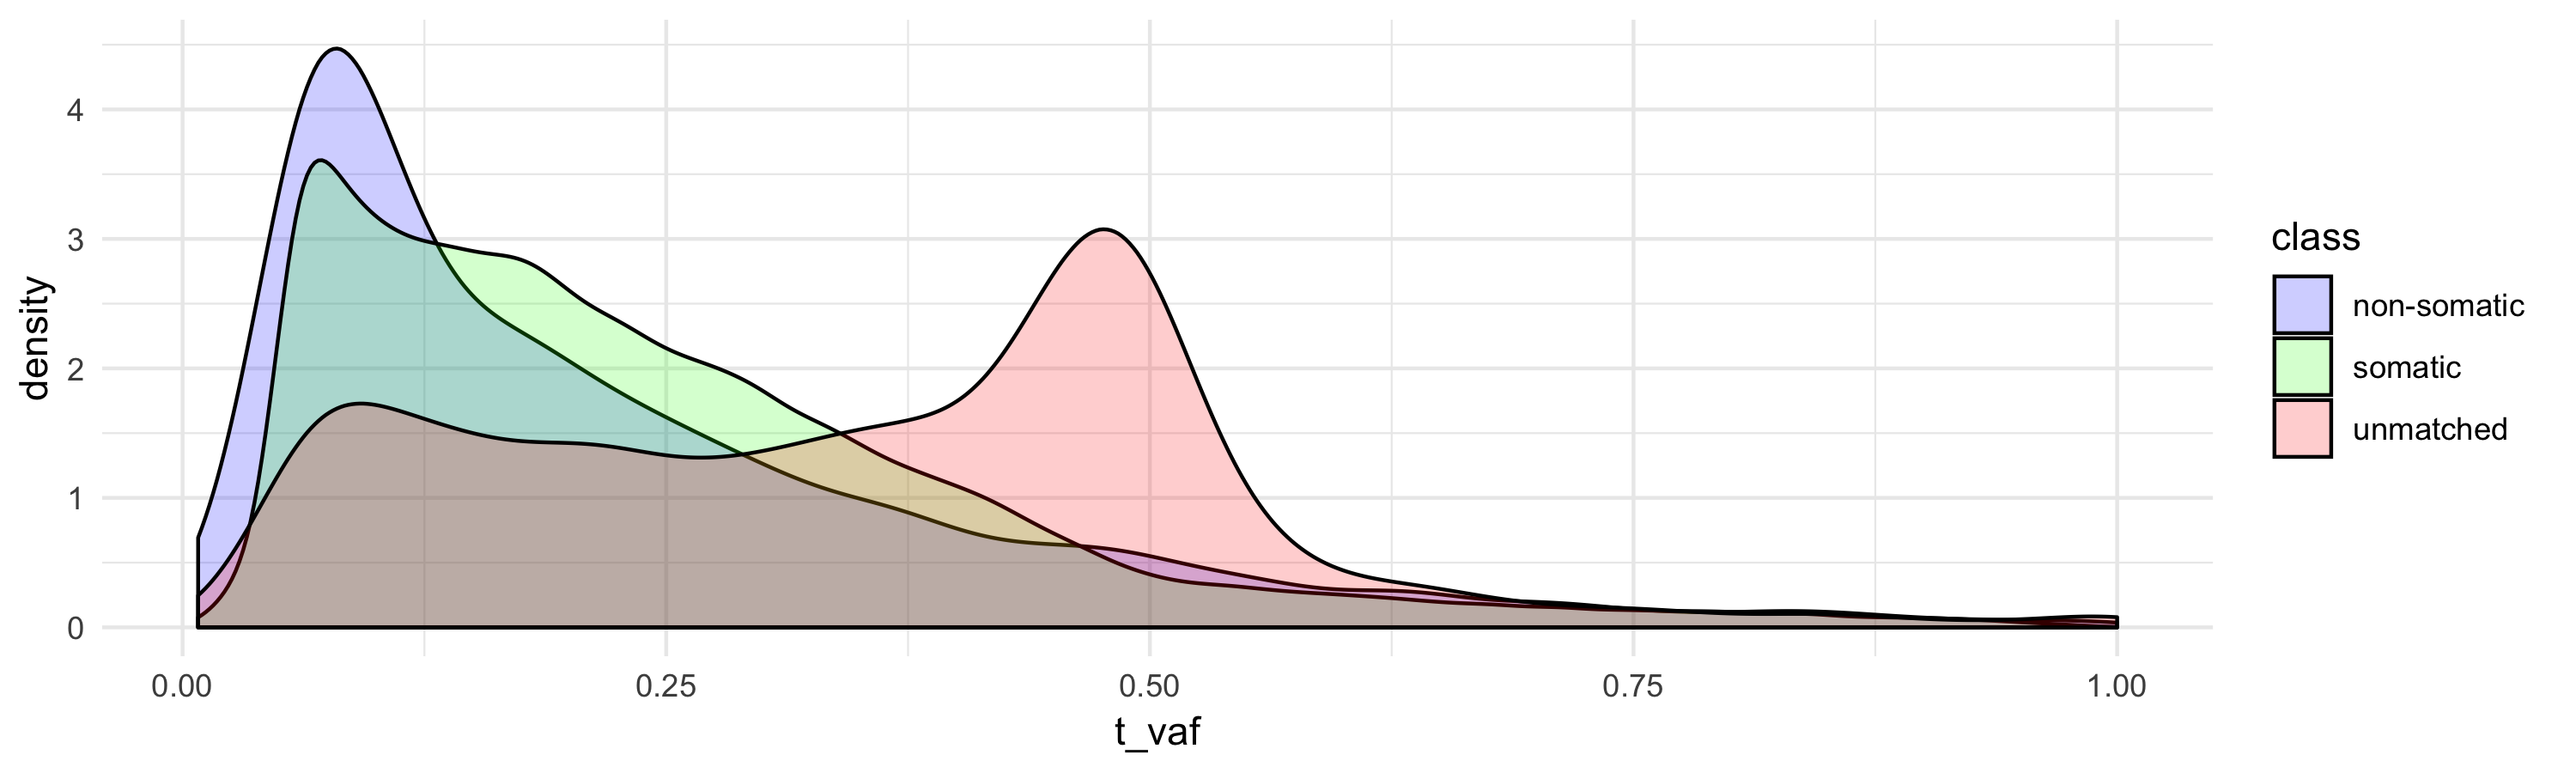

In [96]:
plot_density(imp, "t_vaf", "class")

## Current impact

In [8]:
impact <- read.table("../../../data/annotated_final_IMPACT_mutations_180508.txt",
                     sep = "\t", stringsAsFactors = FALSE, header = TRUE, comment = "#")
nrow(impact)

[1] 194211

In [40]:
head(impact$sample_mut_key)

[1] "P-0000012-T02-IM3_17_7577515_T_G"  "P-0000012-T03-IM3_1_46521514_G_C" 
[3] "P-0000012-T03-IM3_3_142178126_C_A" "P-0000012-T03-IM3_4_55139732_T_A" 
[5] "P-0000012-T03-IM3_4_153249542_C_A" "P-0000012-T03-IM3_4_153332775_C_A"

In [45]:
impact$class <- "non-somatic"
impact$class[impact$confidence_class == "AUTO_OK" | impact$confidence_class == "MANUAL_OK"] <- "somatic"
addmargins(table(impact$class, impact$confidence_class), margin = 2)
100 * nrow(impact[impact$class == "non-somatic",]) / nrow(impact) # percentage of non-somatic mutations

,AUTO_OK,MANUAL_OK,UNLIKELY,Sum
non-somatic,0,0,7199,7199
somatic,180832,6180,0,187012


[1] 3.706793

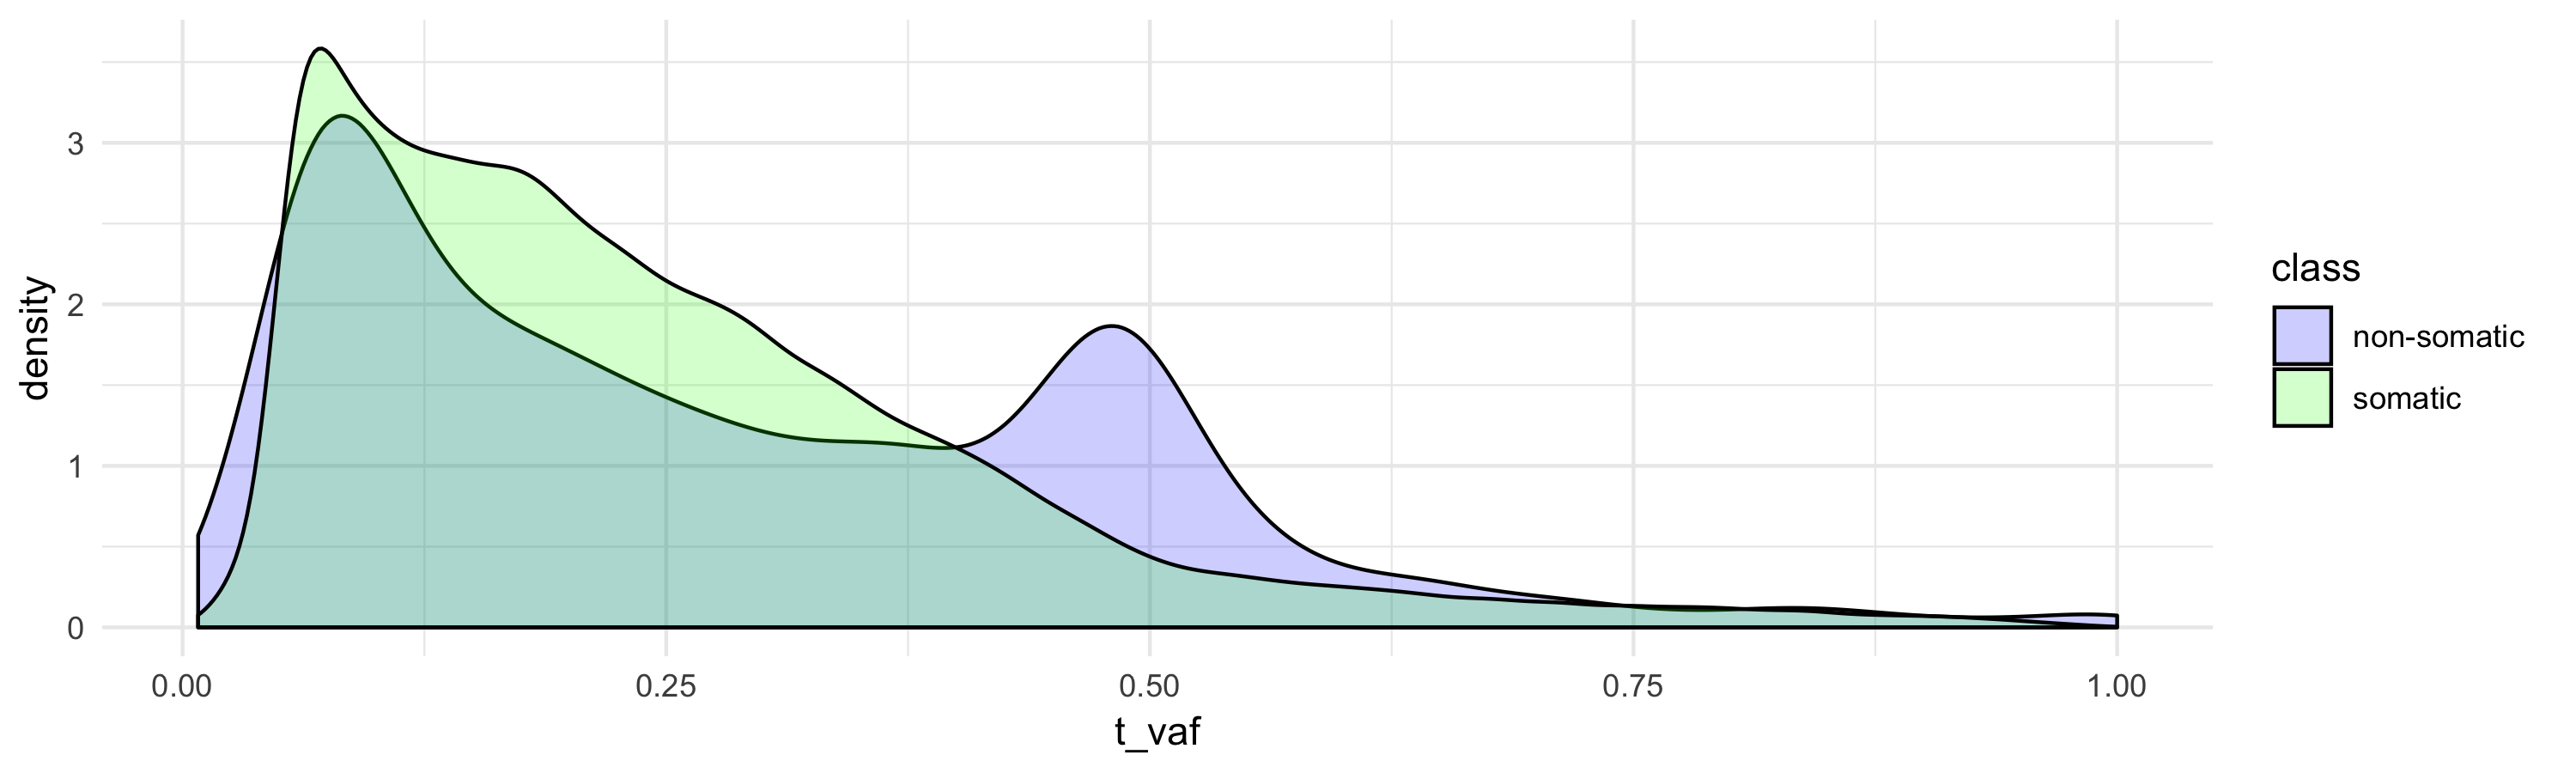

In [46]:
plot_density(impact, "t_vaf", "class")